# Loan Application Status Prediction

### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#importing feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder

#importing train-test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#importing metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#importing Machine Learning models
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading & Reading the dataset

In [2]:
loan = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


- We have loaded the dataset using read_csv.

In [3]:
# Lets check the top 5 rows and bottom 5 rows of the dataset.
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Lets check any random 10 rows:
loan.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
348,LP002137,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
116,LP001404,Female,Yes,0,Graduate,No,3167,2283.0,154.0,360.0,1.0,Semiurban,Y
501,LP002606,Female,No,0,Graduate,No,3159,0.0,100.0,360.0,1.0,Semiurban,Y
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
438,LP002403,Male,No,0,Graduate,Yes,10416,0.0,187.0,360.0,0.0,Urban,N
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
51,LP001157,Female,No,0,Graduate,No,3086,0.0,120.0,360.0,1.0,Semiurban,Y
70,LP001243,Male,Yes,0,Graduate,No,3208,3066.0,172.0,360.0,1.0,Urban,Y


- We can see that NAN values ae present in our dataset.

##### Our target variable is "Loan_status" which has only 2 values i.e Y and N (means Yes or No), So this is a classification problem.

# Exploratory Data Analysis (EDA)

In [6]:
loan.shape

(614, 13)

- Our dataset is having 614 rows and 13 columns.

In [7]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

- Above mentioned are 13 columns of our dataset, from which "Loan_Status" is target variable and remaining 12 columns are featues.

In [8]:
# Let us check the detail information and dtypes of our columns.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- We can see that our dataset is having 8 object datatypes and 5 numerical datatype (float & int).

### Our main aim of building a model is that we need to predict and determine whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

###### So lets check number of data which contains Loan_Status (Y) and (N)

In [9]:
# Total number of (rows) in our dataset
n_rows = loan.shape[0]

# Total number of features(columns) in the dataset
n_features = loan.shape[1]

# Number of data where loan of applicant will be approved (Y)
n_YES = loan[loan['Loan_Status'] == 'Y'].shape[0]

# Number of data where Loan of applicant will not be approved (N)
n_NO = loan[loan['Loan_Status'] == 'N'].shape[0]

# Percentage of approved loan status (YES)
YES_percent =  (n_YES / n_rows) * 100

# Print the results
print("Total number of data recorded: {}".format(n_rows))
print("Total number of features: {}".format(n_features))
print("Loan of applicant will be approved: {}".format(n_YES))
print("Loan of applicant will not be approved: {}".format(n_NO))
print("Percentage of approved loan: {:.2f}%".format(YES_percent))

Total number of data recorded: 614
Total number of features: 13
Loan of applicant will be approved: 422
Loan of applicant will not be approved: 192
Percentage of approved loan: 68.73%


- From above observations we came to know that we have total 614 number of data.
- We have 13 columns.
- We have 422 rows having Loan_status as approved (YES).
- We have 192 rows having Loan-status as not approved (NO).
- Percentage of appoved loans is 68.73%.

### Lets divide our datatypes into object datatype and numerical datatype,so that it will be easy for us to identify and work on it

In [10]:
object_datatype = []
for i in loan.dtypes.index:
    if loan.dtypes[i] == 'object':
        object_datatype.append(i)
print(f"Object Data Type Columns are: ", object_datatype)

Object Data Type Columns are:  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
numerical_datatype = []
for i in loan.dtypes.index:
    if loan.dtypes[i] != 'object':
        numerical_datatype.append(i)
print(f"Numerical Data Type Columns are: ", numerical_datatype)

Numerical Data Type Columns are:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [12]:
# Let us check the value counts of object datatypes:

for columns in object_datatype:
    print(columns)
    print(loan[columns].value_counts())
    print("="*120)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


- From the above data we can see that only column Loan_id has all unique data, because the ID of every individual while applying for loan is different.

In [13]:
# Lets check number of unique values of each columns:
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
# Let us check the unique values of our target variable:
loan['Loan_Status'].unique

<bound method Series.unique of 0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object>

- There are only 2 unique values in our target variable "Loan_Status" i.e Yes and No

In [15]:
# Lets check if there are ay duplicate values in our dataset
loan.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [16]:
# checking duplicates and removing it

print("Before removing duplicates:", loan.duplicated().sum())

loan = loan[~loan.duplicated()]

print("After removing duplicates:", loan.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


- It is now clear that our dataset do not have any duplicate values.

# Checking null values in our dataset

In [17]:
# checking null values:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- We can see that there are columns were data is missing and having NAN values.
- Columns with missing data are:
    1. Gender -13
    2. Married - 3
    3. Dependants - 15
    4. Self_employed- 32
    5. LoanAmount - 22
    6. Loan_Amount_term - 14
    7. Credit_history - 50
- The highest number of missing data is present in credit_history column

<AxesSubplot:>

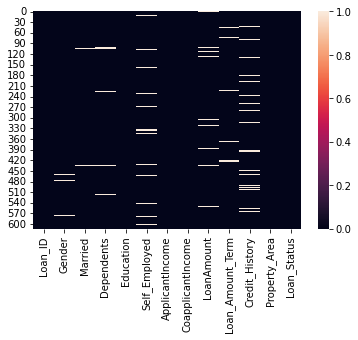

In [18]:
# Let us visualize the null values using heatmap:
sns.heatmap(loan.isnull())

- Now we are able to visualize the missing data in our dataset.

# Dropping Irrelevant columns and Filling the missing data

In [19]:
loan.drop('Loan_ID',axis=1,inplace=True)

I have dropped column 'Loan_ID' as it was not having any input to our dataset.

In [20]:
# Lets check the skewness of our dataset:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

# Statistical Data:

In [21]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- As per above observation we can see that there are missing values in column loanamount, loan_amount_term,credit_history, as its count is showing 592,600,564.

- We can see that above 5 columns have continuous data(numerical) and rest 8 columns have categorical data(object).

- There is big difference between mean and median for above 5 numerical columns.

# Lets check for class imbalance:

labels count: 
  Y    422
N    192
Name: Loan_Status, dtype: int64


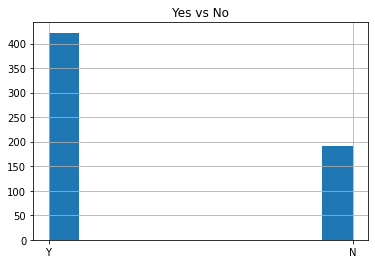

In [22]:
print("labels count: \n ",loan["Loan_Status"].value_counts())

loan["Loan_Status"].hist(grid=True)
plt.title("Yes vs No")
plt.show()

- As per above bar graph we are able to observe that our data is imbalanced for column 'Loan_status', for 'Y' data is above 400 and for 'N' data is below 200.

# Filling all the missing values using mean and mode

In [23]:
# filling numerical data columns with the mean value of that column
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mean())

# filling object data columns with the mode value of that column
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

- All the missing data in the dataset columns are now filled using mean and mode.

In [24]:
#Lets check now if there any any more null or kissing values:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- Now we can se that all missing null values are been filled.

In [25]:
loan.sample(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
537,Male,No,2,Graduate,No,3617,0.0,107.000000,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,146.412162,360.0,1.0,Rural,Y
390,Male,No,3+,Graduate,No,9167,0.0,185.000000,360.0,1.0,Rural,Y
370,Female,No,0,Graduate,Yes,15759,0.0,55.000000,360.0,1.0,Semiurban,Y
580,Male,Yes,2,Graduate,No,6540,0.0,205.000000,360.0,1.0,Semiurban,Y
545,Male,Yes,0,Graduate,No,2768,1950.0,155.000000,360.0,1.0,Rural,Y
238,Female,No,1,Graduate,No,3812,0.0,112.000000,360.0,1.0,Rural,Y
362,Male,Yes,0,Graduate,No,4750,2333.0,130.000000,360.0,1.0,Urban,Y
514,Male,No,0,Graduate,No,5815,3666.0,311.000000,360.0,1.0,Rural,N
446,Male,Yes,2,Not Graduate,No,4652,0.0,110.000000,360.0,1.0,Rural,Y


# Visualization of DATA

### Countplot

In [26]:
# Lets check numerical and object datatype columns after dropping and filling all data:
object_datatype = []
for i in loan.dtypes.index:
    if loan.dtypes[i] == 'object':
        object_datatype.append(i)
print(f"Object Data Type Columns are: ", object_datatype)

Object Data Type Columns are:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [27]:
numerical_datatype = []
for i in loan.dtypes.index:
    if loan.dtypes[i] != 'object':
        numerical_datatype.append(i)
print(f"Numerical Data Type Columns are: ", numerical_datatype)

Numerical Data Type Columns are:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


- Gender vs Loan_Status


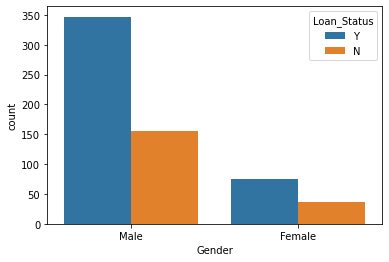

<Figure size 1080x504 with 0 Axes>

- Married vs Loan_Status


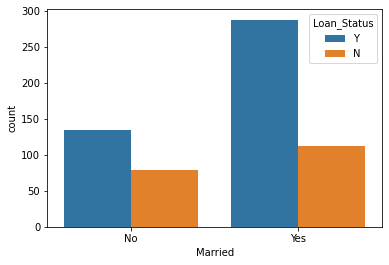

<Figure size 1080x504 with 0 Axes>

- Dependents vs Loan_Status


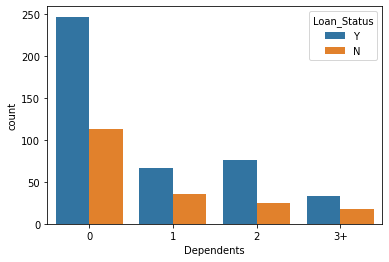

<Figure size 1080x504 with 0 Axes>

- Education vs Loan_Status


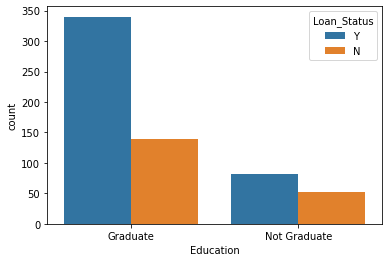

<Figure size 1080x504 with 0 Axes>

- Self_Employed vs Loan_Status


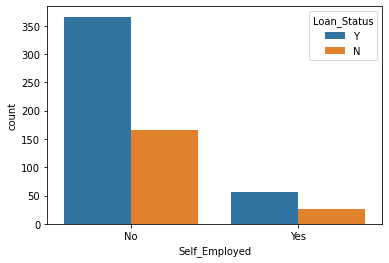

<Figure size 1080x504 with 0 Axes>

- Property_Area vs Loan_Status


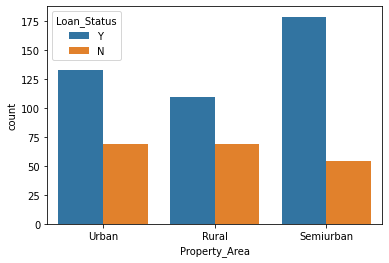

<Figure size 1080x504 with 0 Axes>

- Loan_Status vs Loan_Status


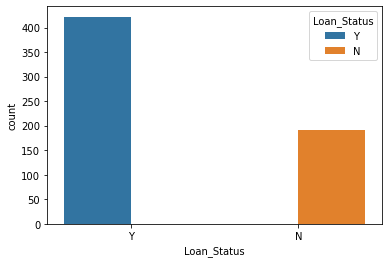

<Figure size 1080x504 with 0 Axes>

In [28]:
for col in object_datatype:
    print("-",col,"vs Loan_Status")
    ax=sns.countplot(x=str(col), hue='Loan_Status',data = loan)
    plt.figure(figsize=(15,7))
    (ax,loan.Gender,2,2)
    plt.tight_layout()
    plt.show()

##### As per above countplot we are able to visualize the categorical column range with respect to our target variable 'Loan_Status'

# Pie Chart

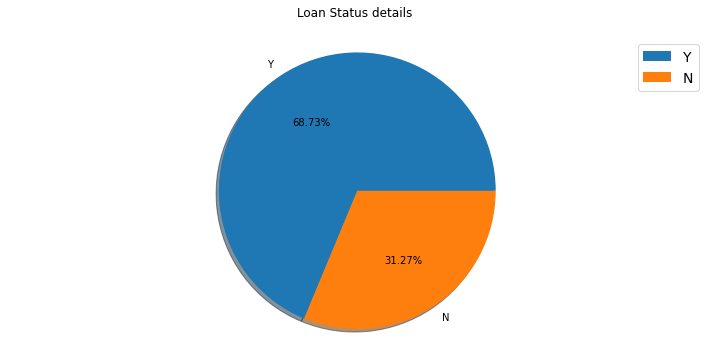

In [29]:
plt.figure(figsize=(10,5))
plt.pie(loan['Loan_Status'].value_counts(), labels=loan['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- As per above pie chart we are able to visualize our target variable "Loan_Status" details.

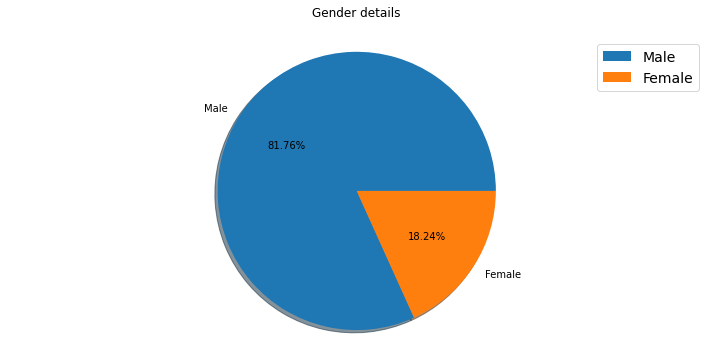

In [30]:
plt.figure(figsize=(10,5))
plt.pie(loan['Gender'].value_counts(), labels=loan['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- As per above pie chart visualization we are able to understand that number of male applicants are more i.e 81.76%

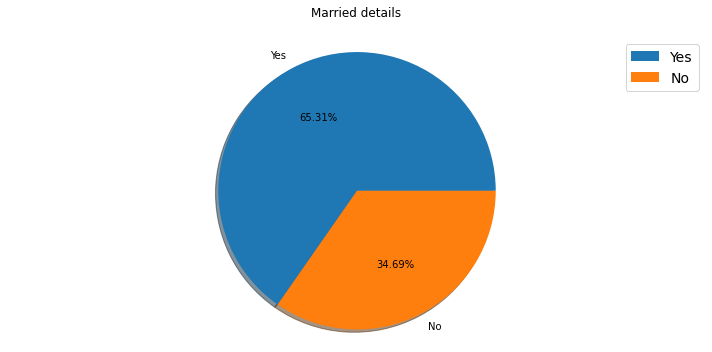

In [31]:
plt.figure(figsize=(10,5))
plt.pie(loan['Married'].value_counts(), labels=loan['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Married details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- As per above pie chart visualization we are able to understand that the individual who has applied for loan are 65.31% married.

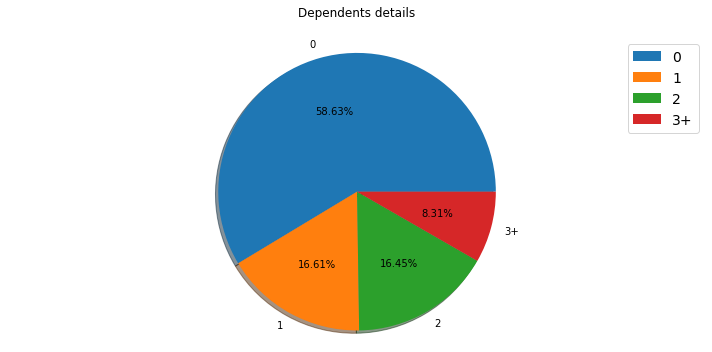

In [32]:
plt.figure(figsize=(10,5))
plt.pie(loan['Dependents'].value_counts(), labels=loan['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Dependents details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- Applicants with 0 dependents are more in number with 58.63%, followed by applicants with 1 dependent with 16.61%, followed by 2 dependents with 16.45% and least applicants with 8.31% have 3+ dependents.

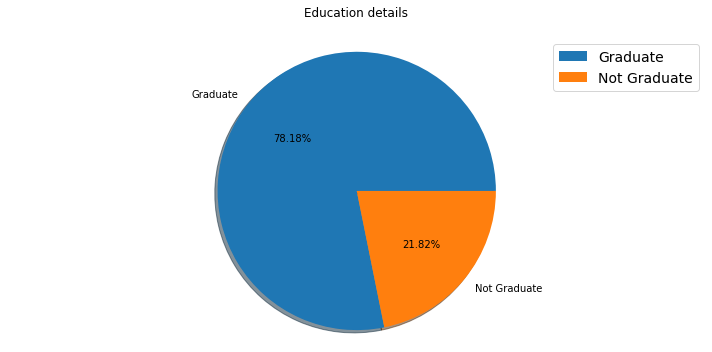

In [33]:
plt.figure(figsize=(10,5))
plt.pie(loan['Education'].value_counts(), labels=loan['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- Applicants who have applied for loan are 78.18 % graduate and 21.82% not graduate. 

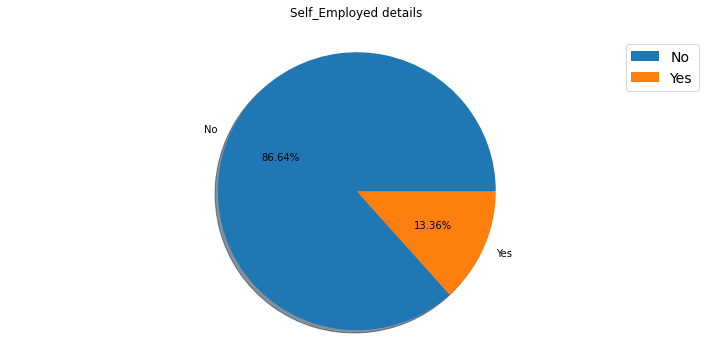

In [34]:
plt.figure(figsize=(10,5))
plt.pie(loan['Self_Employed'].value_counts(), labels=loan['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self_Employed details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- Applicants are mostly not self-employed, they hold private jobs.

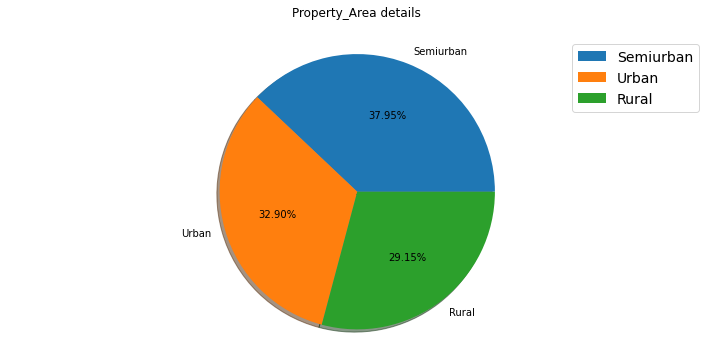

In [35]:
plt.figure(figsize=(10,5))
plt.pie(loan['Property_Area'].value_counts(), labels=loan['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property_Area details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- Applicants are mostly from semiurban area with 37.95% followed by urban with 32.90% and then rural 29.15%

# Pairplot

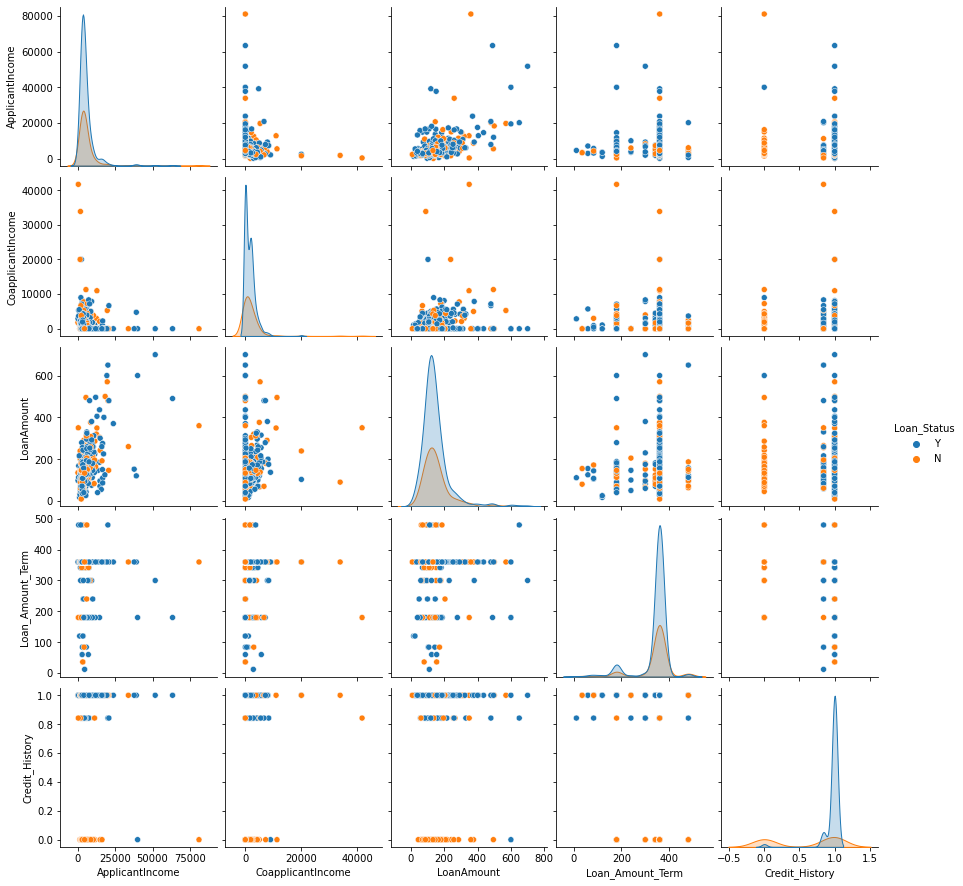

In [36]:
sns.pairplot(loan, hue='Loan_Status', diag_kind='kde')
plt.show()

- We are able to visualize using pairplot that how the datapoints are distributed in each of the numerical data columns.

# Scatterplot

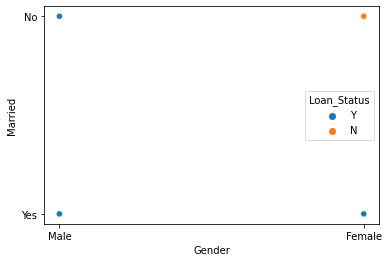

In [37]:
sns.scatterplot(x = "Gender", y = "Married",hue='Loan_Status', data = loan)
plt.show()

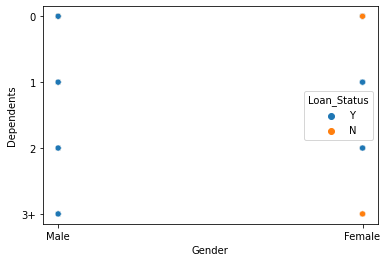

In [38]:
sns.scatterplot(x = "Gender", y = "Dependents",hue='Loan_Status', data = loan)
plt.show()

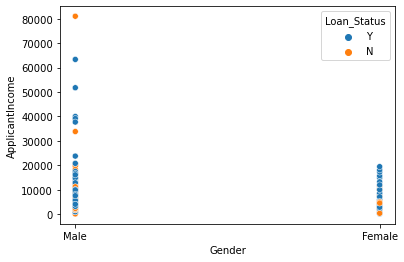

In [39]:
sns.scatterplot(x = "Gender", y = "ApplicantIncome",hue='Loan_Status', data = loan)
plt.show()

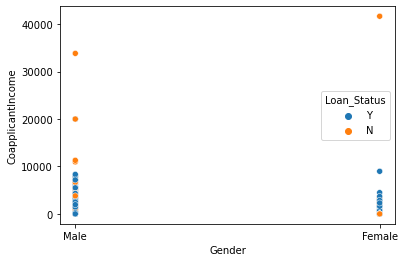

In [40]:
sns.scatterplot(x = "Gender", y = "CoapplicantIncome",hue='Loan_Status', data = loan)
plt.show()

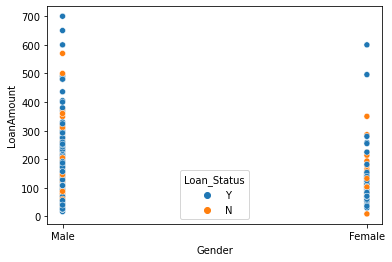

In [41]:
sns.scatterplot(x = "Gender", y = "LoanAmount",hue='Loan_Status', data = loan)
plt.show()

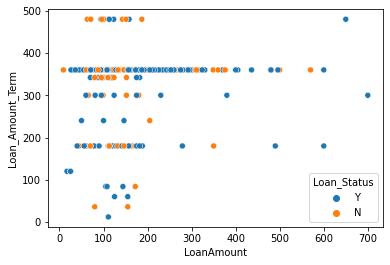

In [42]:
sns.scatterplot(x = "LoanAmount", y = "Loan_Amount_Term",hue='Loan_Status', data = loan)
plt.show()

# Bar Plot

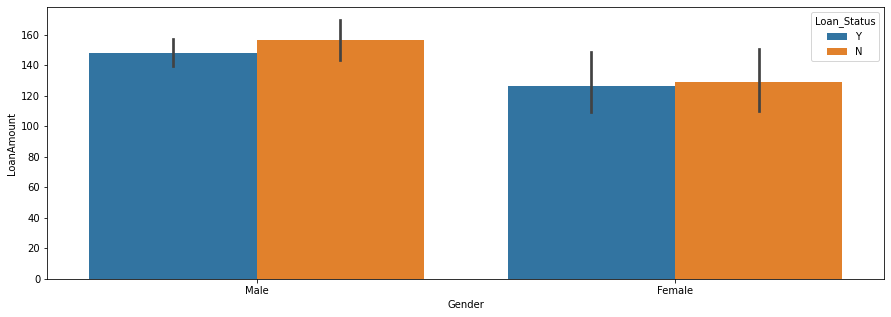

In [43]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Gender", y = "LoanAmount", data = loan,hue='Loan_Status')
plt.show()

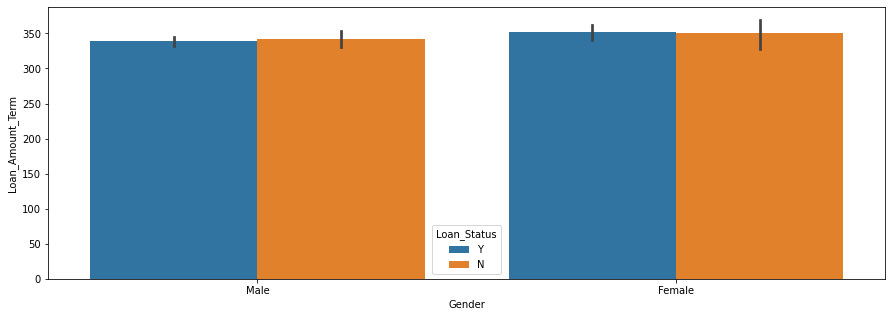

In [44]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Gender", y = "Loan_Amount_Term", data = loan,hue='Loan_Status')
plt.show()

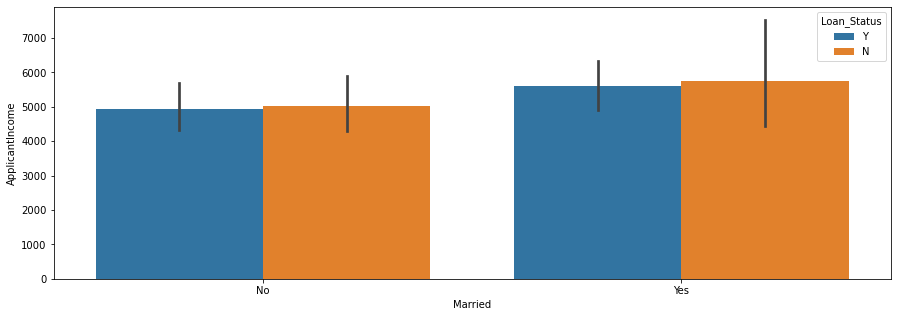

In [45]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Married", y = "ApplicantIncome", data = loan,hue='Loan_Status')
plt.show()

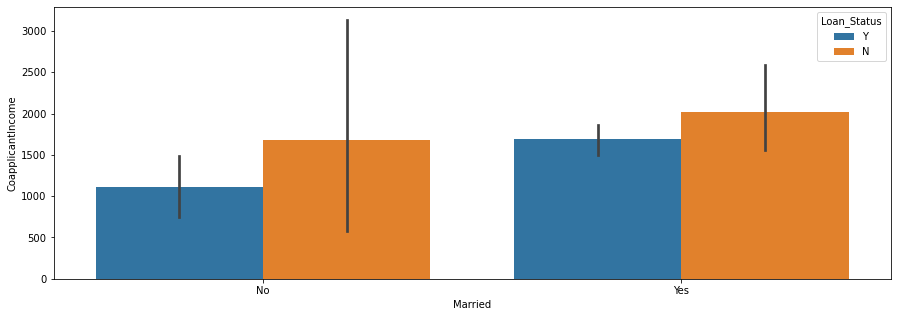

In [46]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Married", y = "CoapplicantIncome", data = loan,hue='Loan_Status')
plt.show()

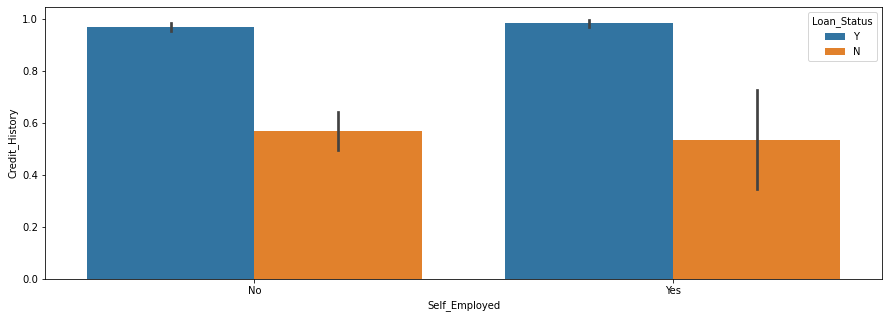

In [47]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Self_Employed", y = "Credit_History", data = loan,hue='Loan_Status')
plt.show()

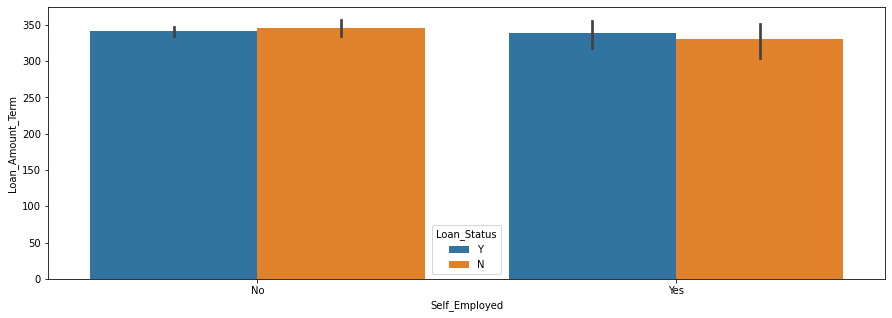

In [48]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Self_Employed", y = "Loan_Amount_Term", data = loan,hue='Loan_Status')
plt.show()

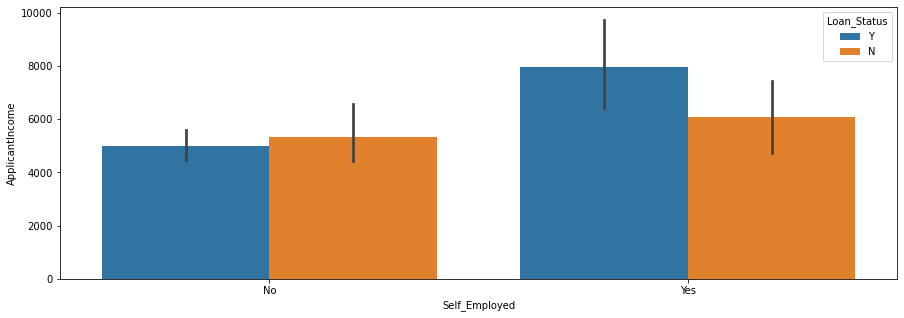

In [49]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Self_Employed", y = "ApplicantIncome", data = loan,hue='Loan_Status')
plt.show()

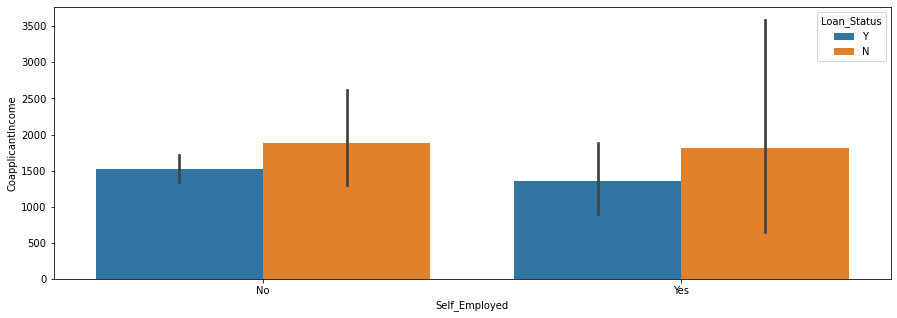

In [50]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Self_Employed", y = "CoapplicantIncome", data = loan,hue='Loan_Status')
plt.show()

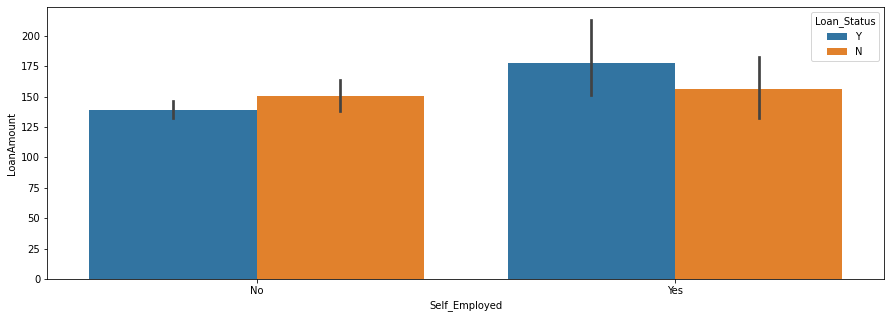

In [51]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Self_Employed", y = "LoanAmount", data = loan,hue='Loan_Status')
plt.show()

# Line Plot

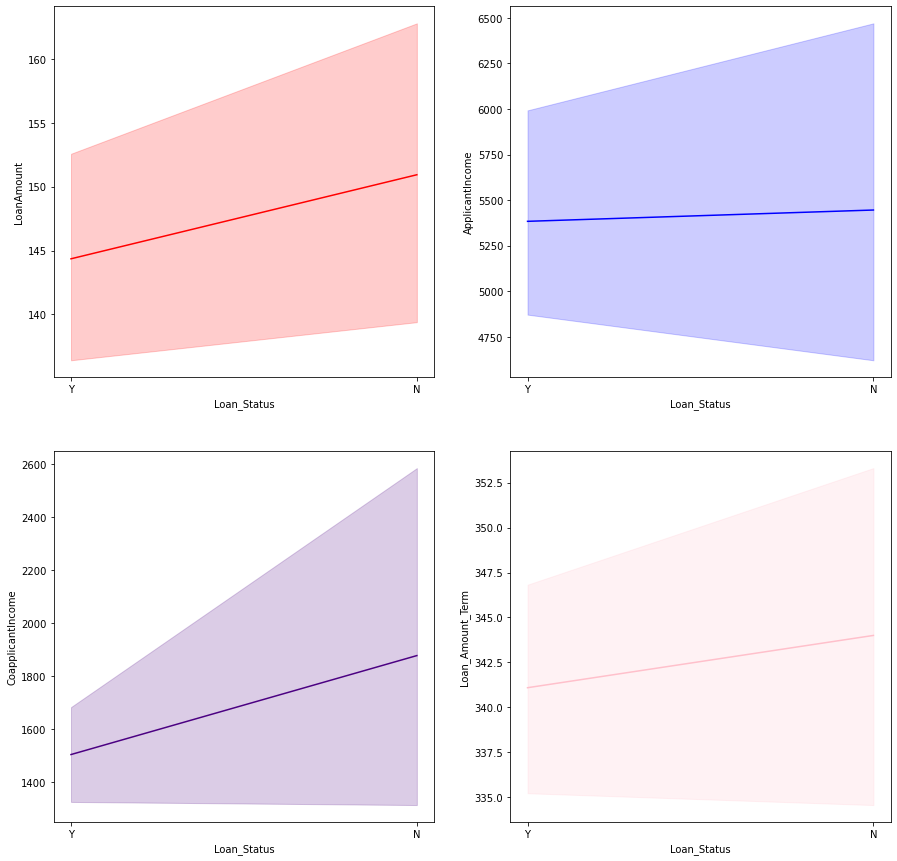

In [52]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking loanamount with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='LoanAmount',ax=axes[0,0],data=loan,color="r")

# Checking ApplicantIncome with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='ApplicantIncome',ax=axes[0,1],data=loan,color="b")

# Checking CoapplicantIncome with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='CoapplicantIncome',ax=axes[1,0],data=loan,color="indigo")

# Checking Loan_amount_term with respect to Loan_Status
sns.lineplot(x='Loan_Status',y='Loan_Amount_Term',ax=axes[1,1],data=loan,color="pink")
plt.show()

- All columns have positive linera relation with target variable 'Loan_Status'

# Distribution plot

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

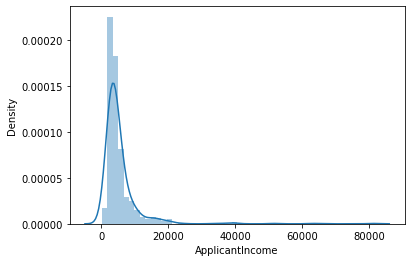

In [53]:
sns.distplot(loan['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

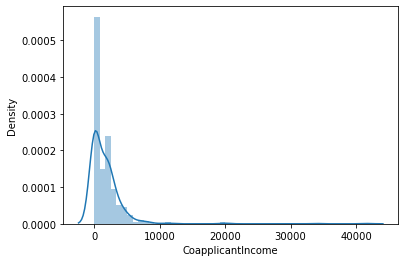

In [54]:
sns.distplot(loan['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

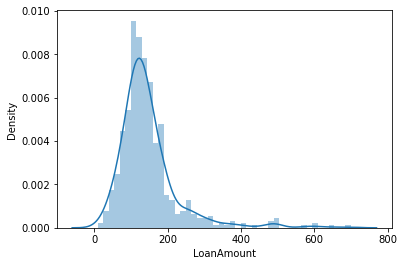

In [55]:
sns.distplot(loan['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

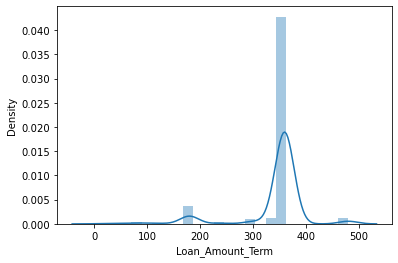

In [56]:
sns.distplot(loan['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

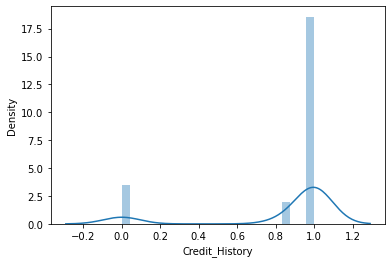

In [57]:
sns.distplot(loan['Credit_History'])

# Checking for outliers:

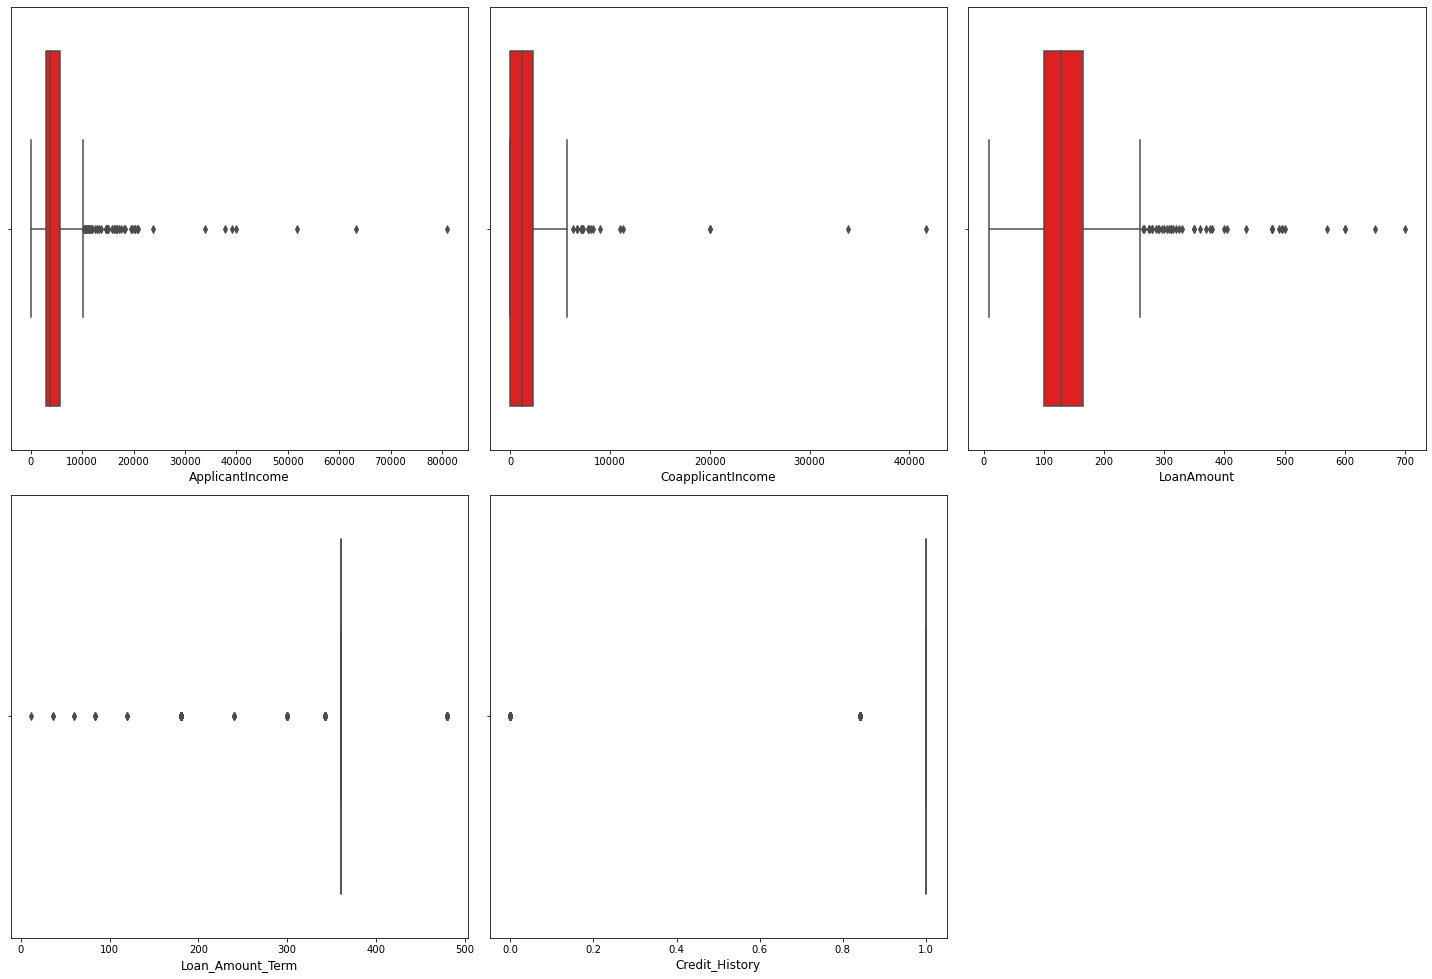

In [58]:
# Identifying the outliers
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_datatype:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(loan[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

- We can observe that there are many outliers present in our numerical column.

- We will have to treat the outliers.

# Removing outliers using Zscore method

In [59]:
# Features containing outliers
features = loan[['ApplicantIncome', 'Credit_History', 'Loan_Amount_Term', 'LoanAmount', 'CoapplicantIncome']]

# Using zscore to remove outliers

z=np.abs(zscore(features))

z

,ApplicantIncome,Credit_History,Loan_Amount_Term,LoanAmount,CoapplicantIncome
0,0.072991,0.451640,0.279851,0.000000,0.554487
1,0.134412,0.451640,0.279851,0.219273,0.038732
2,0.393747,0.451640,0.279851,0.957641,0.554487
3,0.462062,0.451640,0.279851,0.314547,0.251980
4,0.097728,0.451640,0.279851,0.064454,0.554487
...,...,...,...,...,...
609,0.410130,0.451640,0.279851,0.898095,0.554487
610,0.212557,0.451640,2.518655,1.267279,0.554487
611,0.437174,0.451640,0.279851,1.269371,0.472404
612,0.357064,0.451640,0.279851,0.483367,0.554487


In [60]:
# Creating new dataframe
new_loan = loan[(z<3).all(axis=1)] 
new_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [61]:
#checking % of data loss
new_loan.shape

(577, 12)

In [62]:
loan.shape

(614, 12)

In [63]:
((614-577)/614)*100

6.026058631921824

##### By using z-score method we have lost our 6% of data.

# Removing the outlier using IQR Method

In [64]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_loan1=loan[~((loan < (Q1 - 1.5 * IQR)) |(loan > (Q3 + 1.5 * IQR))).any(axis=1)]
new_loan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.000000,360.0,1.0,Rural,Y
608,Male,Yes,0,Graduate,No,3232,1950.0,108.000000,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y


In [65]:
#checking the %loss of data
(614-350)/614*100

42.99674267100978

##### By using IQR method for removing outliers, we have lost 42.99% of data which is not worth it, so we will proceed with z-score only.

# Encoding the categorical columns using Label Encoding.

In [66]:
# Label Encoder

le = LabelEncoder()
loan["Loan_Status"] = le.fit_transform(loan["Loan_Status"])
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [67]:
# Ordinal Encoder

oe = OrdinalEncoder()
loan['Gender'] = oe.fit_transform(loan['Gender'].values.reshape(-1,1))
loan['Married'] = oe.fit_transform(loan['Married'].values.reshape(-1,1))
loan['Dependents'] = oe.fit_transform(loan['Dependents'].values.reshape(-1,1))
loan['Education'] = oe.fit_transform(loan['Education'].values.reshape(-1,1))
loan['Self_Employed'] = oe.fit_transform(loan['Self_Employed'].values.reshape(-1,1))
loan['Property_Area'] = oe.fit_transform(loan['Property_Area'].values.reshape(-1,1))
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


In [68]:
print(f"Shape of our data frame after encoding is", loan.shape)
loan.isna().sum()

Shape of our data frame after encoding is (614, 12)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

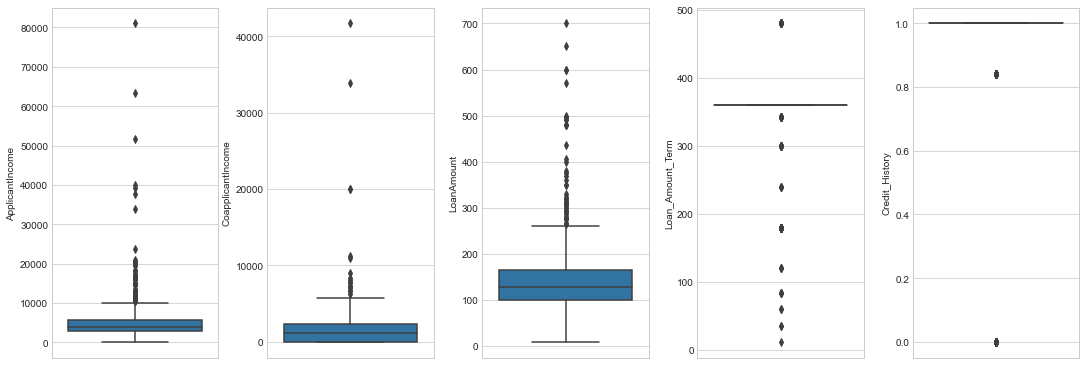

In [69]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in loan[numerical_datatype].items():
    sns.boxplot(y=col, data=loan, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

In [70]:
# Lets check the skewness of our new dataset
loan.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

- We can observe that there is skewness present in many columns.

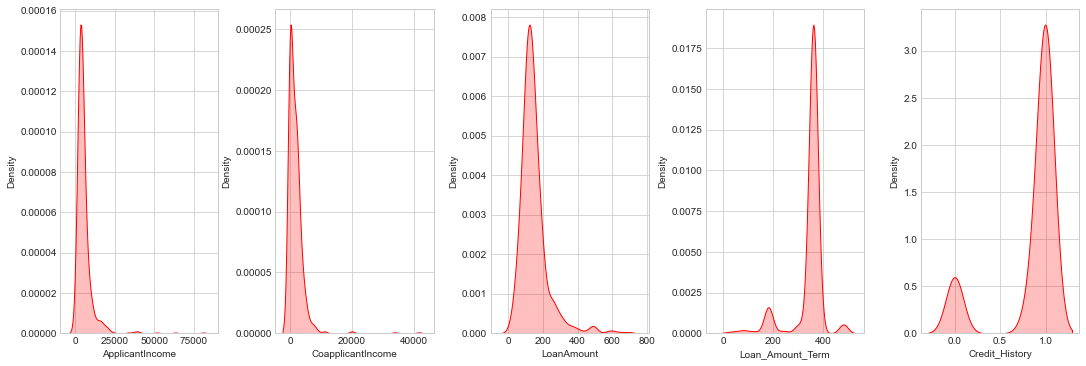

In [71]:
#lets plot skewness of new dataset using distribution plot

fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in loan[numerical_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

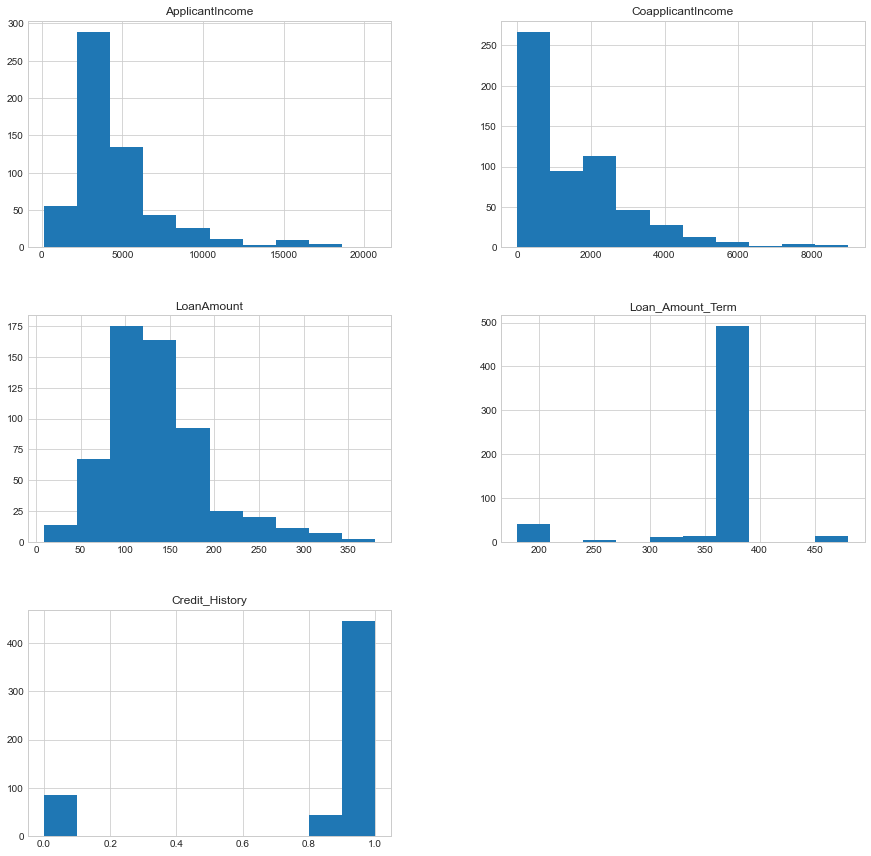

In [72]:
new_loan.hist(figsize=(15,15))
plt.show()

- Above graph is the histogram representation of our new dataset after removing outliers.

# Correlation using Heatmap

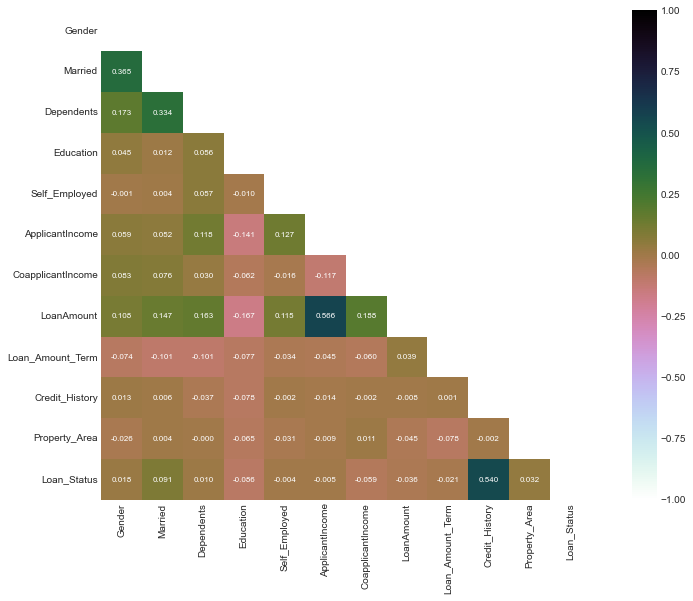

In [73]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(loan.corr())
plt.figure(figsize=(15,9))
sns.heatmap(loan.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':8}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [74]:
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


- We can observe that there is no multicollinearity issue between the columns.

- More columns are negatively correlated as compared to positive correlation.

# Correlation Bar Plot comparing features with our label'Loan_Status'.

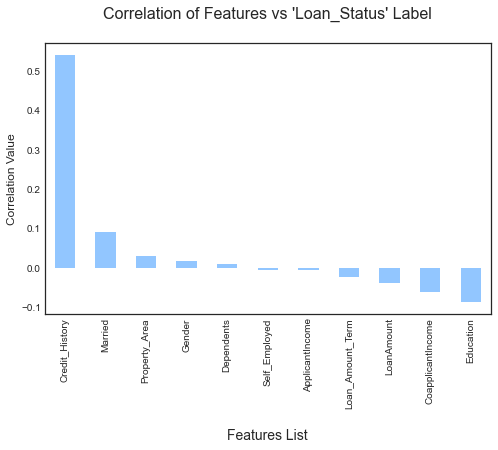

In [75]:
plt.style.use('seaborn-white')
loan_corr = loan.corr()
plt.figure(figsize=(8,5))
loan_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.title("Correlation of Features vs 'Loan_Status' Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- We can see that columns loan amount term, loan amount, co applicant income and education are negatively correlated while all the remaining feature columns are positively correlated with our label column.

# Seperating Label "y" and Features "x"

In [76]:
X = loan.drop('Loan_Status', axis=1)
Y = loan['Loan_Status']

# Checking the class Imbalance issue

In [77]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

- We can see that there is imbalance in the counts of Y, we will fix it through oversampling technique.

In [78]:
# adding samples to make all the categorical label values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [80]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

- Now we can see that our Y label is now balanced.

# Feature Scaling

In [81]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.493968,-1.358790,-0.776321,-0.586047,-0.397170,0.084018,-0.518750,-0.021939,0.276842,0.589444,1.243250
1,0.493968,0.799148,0.260673,-0.586047,-0.397170,-0.129437,-0.050443,-0.247377,0.276842,0.589444,-1.359771
2,0.493968,0.799148,-0.776321,-0.586047,2.745734,-0.396340,-0.518750,-1.006501,0.276842,0.589444,1.243250
3,0.493968,0.799148,-0.776321,1.891058,-0.397170,-0.466648,0.213524,-0.345328,0.276842,0.589444,1.243250
4,0.493968,-1.358790,-0.776321,-0.586047,-0.397170,0.109477,-0.518750,-0.088205,0.276842,0.589444,1.243250


# Checking VIF(Variance Inflation Factor) values:

In [82]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.157508,Gender
1,1.269874,Married
2,1.158152,Dependents
3,1.078431,Education
4,1.020929,Self_Employed
5,1.692962,ApplicantIncome
6,1.201764,CoapplicantIncome
7,1.795272,LoanAmount
8,1.051034,Loan_Amount_Term
9,1.013850,Credit_History


- We can observe that none of the feature column has value greater than 10, so we can now proceed without any issue.

# MODEL BUILDING:

In [83]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 81.51658767772511 on Random State 658


- Our best accuracy score is 81.51 with random state as 658.

# Checking Feature Importance with Bar Graph

,Importance
Features,
Credit_History,0.276
ApplicantIncome,0.156
LoanAmount,0.134
CoapplicantIncome,0.091
Property_Area,0.075
Married,0.068
Dependents,0.060
Education,0.050
Loan_Amount_Term,0.043


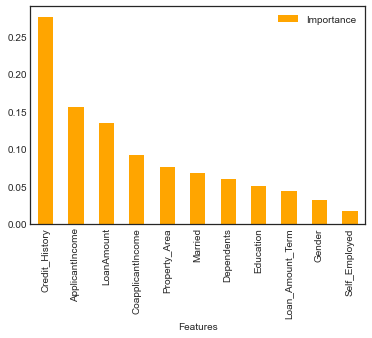

In [85]:
rf=RandomForestClassifier()

rf.fit(X_train, Y_train)

importance = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importance = importance.sort_values('Importance', ascending=False).set_index('Features')
importance.plot.bar(color='orange')
importance

- As per above feature importance graph we are able to visualize the features which are more important.

# Machine Learning Model for Classification type with Evaluation Metrics.

In [89]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=112)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [90]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.54      0.63       104
           1       0.65      0.84      0.73       107

    accuracy                           0.69       211
   macro avg       0.71      0.69      0.68       211
weighted avg       0.71      0.69      0.68       211

Accuracy Score: 69.19431279620854
Cross Validation Score: 72.51197520428289

Accuracy Score - Cross Validation Score is -3.317662408074355


In [91]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.59      0.69       104
           1       0.69      0.88      0.77       107

    accuracy                           0.73       211
   macro avg       0.76      0.73      0.73       211
weighted avg       0.75      0.73      0.73       211

Accuracy Score: 73.45971563981043
Cross Validation Score: 76.18836291913215

Accuracy Score - Cross Validation Score is -2.72864727932172


In [92]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       104
           1       0.79      0.83      0.81       107

    accuracy                           0.81       211
   macro avg       0.81      0.81      0.81       211
weighted avg       0.81      0.81      0.81       211

Accuracy Score: 80.56872037914692
Cross Validation Score: 77.85080304311074

Accuracy Score - Cross Validation Score is 2.71791733603618


In [93]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.80       104
           1       0.79      0.89      0.83       107

    accuracy                           0.82       211
   macro avg       0.83      0.82      0.82       211
weighted avg       0.83      0.82      0.82       211

Accuracy Score: 81.99052132701422
Cross Validation Score: 83.18751761059453

Accuracy Score - Cross Validation Score is -1.1969962835803045


In [94]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.52      0.63       104
           1       0.65      0.88      0.75       107

    accuracy                           0.70       211
   macro avg       0.73      0.70      0.69       211
weighted avg       0.73      0.70      0.69       211

Accuracy Score: 70.14218009478674
Cross Validation Score: 70.97351366582136

Accuracy Score - Cross Validation Score is -0.8313335710346195


In [95]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       104
           1       0.80      0.86      0.83       107

    accuracy                           0.82       211
   macro avg       0.82      0.82      0.82       211
weighted avg       0.82      0.82      0.82       211

Accuracy Score: 81.99052132701422
Cross Validation Score: 82.47604959143419

Accuracy Score - Cross Validation Score is -0.485528264419969


In [96]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       104
           1       0.77      0.81      0.79       107

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211

Accuracy Score: 78.19905213270142
Cross Validation Score: 81.64553395322626

Accuracy Score - Cross Validation Score is -3.4464818205248378


In [97]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       104
           1       0.79      0.87      0.83       107

    accuracy                           0.82       211
   macro avg       0.82      0.81      0.81       211
weighted avg       0.82      0.82      0.81       211

Accuracy Score: 81.51658767772511
Cross Validation Score: 82.7120315581854

Accuracy Score - Cross Validation Score is -1.1954438804602887


# Hyper parameter tuning on the best Classification ML Model

##### From above all the classification models, I am selecting Extra tree classifier as my best model.

In [98]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-4, -2, 0, 2],
              'random_state' : [77, 658, 789],
              'max_depth' : [0, 20, 40],
              'n_estimators' : [10, 20, 30]
             }

In [100]:
GSCV = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=7)

In [101]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=7, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 20, 40], 'n_estimators': [10, 20, 30],
                         'n_jobs': [-4, -2, 0, 2],
                         'random_state': [77, 658, 789]})

In [102]:
# Now lets get the results

print(GSCV.best_score_)
print(GSCV.best_estimator_)
print(GSCV.best_params_)

0.8372928658642944
ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=20,
                     n_jobs=-4, random_state=658)
{'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 20, 'n_jobs': -4, 'random_state': 658}


In [103]:
Final_Model = ExtraTreesClassifier(criterion='entropy', max_depth=30, n_estimators=100, n_jobs=-2, random_state=1000)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 85.30805687203792


##### I have successfully completed the Hyper Parameter Tuning on my Final Model and received the accuracy score as 85%.

# AUC ROC Curve

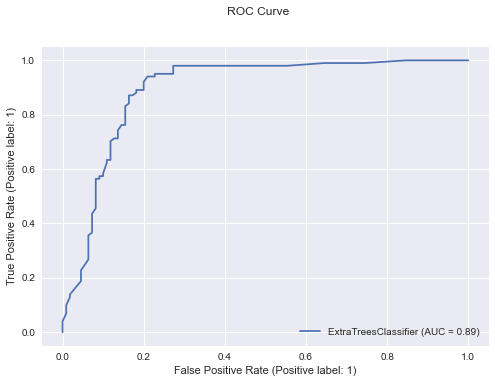

In [105]:
from sklearn import metrics

plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AUC-ROC curve gives accuracy score as 89%.

# Confusion Matrix

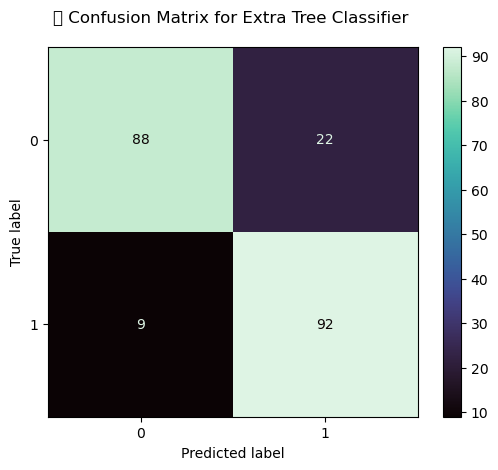

In [107]:
plt.style.use('default')
class_names = loan.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Tree Classifier \n')
plt.show()

- The above confusion matrix gives me a clear idea about no. of correct outputs and no of incorrect outputs(ML missed to give the correct prediction which is seen in the black box)

# Saving the model

In [108]:
filename = "Final_Loan_Status.pkl"
joblib.dump(Final_Model, filename)

['Final_Loan_Status.pkl']

### Finally my best ML model is saved in joblib with filename "Final_Loan_Status" with an accuracy score of 85%.